# Section 07 - Guidance Scheme

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
planet = Planet('URANUS')
planet.loadAtmosphereModel('../../../atmdata/Uranus/uranus-gram-avg.dat', 0 , 1 ,2, 3, heightInKmFlag=True)
planet.h_skip = 1000.0E3
planet.h_low  = 120e3
planet.h_trap = 100e3

In [4]:
vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,-11.8 ,0.0,0.0)
vehicle.setSolverParams(1E-6)

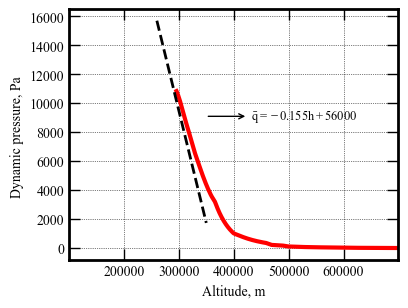

In [15]:
vehicle.propogateEntry2(200, 0.1, 0)

# Values for -13.64 deg, these are the linear fit
# y = ax + b parameters used to compute Ghdot and Gq (see refs.)
a = -0.155
b =  56000

x_arr = np.linspace(260.0E3,350.0E3,101)
y_arr = a*x_arr + b

fig = plt.figure()
fig.set_size_inches([4.25,3.25])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.plot(vehicle.h_kmc*1E3,vehicle.dyn_pres_atm*1.01325E5,'r-',linewidth=3.0)

plt.xlim(100.0E3, 700.0E3)
#plt.ylim(0.0,12500.0)

plt.plot(x_arr,y_arr,color='k',linewidth=2.0,linestyle='dashed')
plt.xlabel("Altitude, m", fontsize=10)
plt.ylabel("Dynamic pressure, Pa ",fontsize=10)

plt.xticks(np.array([200.0E3 ,300E3, 400.00E3,  500e3, 600.0E3]),fontsize=10)

ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)
ax.tick_params(direction='in')

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=1, length=8)
ax.yaxis.set_tick_params(width=1, length=8)
ax.xaxis.set_tick_params(width=1, length=6, which='minor')
ax.yaxis.set_tick_params(width=1, length=6, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

ax.annotate(r'$\bar{q} = -0.155h + 56000$',
    xy=(348586, 9103.4) ,
    xytext=(431181, 9103.4),
    arrowprops=dict(arrowstyle="<-"),  va="center", ha="left", fontsize=9)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
    
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/dyn-pres-profile.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/dyn-pres-profile.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/dyn-pres-profile.eps', dpi=300,bbox_inches='tight')


plt.show()

In [11]:
0.05**2*146/(0.24*0.155)

9.81182795698925

In [12]:
2*1.5*0.05*146/0.24

91.25000000000001